In [34]:
import os

In [35]:
os.environ['PROJ_LIB'] = '/Users/patricksaul/anaconda3/share/proj'

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [16]:
import io
import requests

In [17]:
url = "https://joshuaproject.net/resources/datasets/1"
response = requests.get(url)

In [19]:
open('unreached.csv','wb').write(response.content)

4000351

In [25]:
ur_df = pd.read_csv('unreached.csv', low_memory=False,skiprows=1)

In [26]:
ur_df.head()

,ROG3,Ctry,PeopleID3,ROP3,PeopNameAcrossCountries,PeopNameInCountry,Population,JPScale,LeastReached,ROL3,...,RegionCode,RegionName,ROG2,Continent,10_40Window,IndigenousCode,WorkersNeeded,Frontier,Latitude,Longitude
0,AF,Afghanistan,14372.0,107989.0,"Afghan, Tajik","Afghan, Tajik",10485000.0,1.0,Y,prs,...,5.0,"Asia, Central",ASI,Asia,Y,Y,210.0,Y,31.156210,62.146120
1,AF,Afghanistan,19409.0,100096.0,Afshari,Afshari,15000.0,1.0,Y,azb,...,5.0,"Asia, Central",ASI,Asia,Y,N,1.0,Y,34.447960,69.289760
2,AF,Afghanistan,21454.0,118270.0,Aimaq,Aimaq,1595000.0,1.0,Y,aiq,...,5.0,"Asia, Central",ASI,Asia,Y,Y,32.0,Y,35.005010,63.128594
3,AF,Afghanistan,15741.0,110448.0,"Americans, U.S.","Americans, U.S.",13000.0,5.0,N,eng,...,5.0,"Asia, Central",ASI,Asia,Y,N,NaN,N,34.528621,69.168549
4,AF,Afghanistan,16221.0,111334.0,Ansari,Ansari,2400.0,1.0,Y,urd,...,5.0,"Asia, Central",ASI,Asia,Y,N,1.0,Y,34.547770,69.319800


In [27]:
ur_df.describe()

,PeopleID3,ROP3,Population,JPScale,BibleStatus,RLG3,PercentAdherents,PercentEvangelical,PeopleID1,PeopleID2,CountOfCountries,RegionCode,WorkersNeeded,Latitude,Longitude
count,17429.00000,17362.000000,1.740800e+04,17429.000000,17429.000000,17429.000000,17429.000000,16086.000000,17429.000000,17429.000000,17429.000000,17429.000000,7390.000000,17429.000000,17429.000000
mean,15174.46589,108719.333372,4.453214e+05,2.672557,3.743359,3.368294,37.280315,6.169163,18.415055,282.734982,12.599633,6.034655,9.234235,17.068859,45.148645
std,3286.02555,5164.926138,7.502735e+06,1.618941,1.626381,2.191264,39.329503,10.138017,4.051776,114.735295,31.019338,3.406587,66.150826,20.982631,69.459944
min,10119.00000,100004.000000,1.000000e+01,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,100.000000,1.000000,1.000000,1.000000,-54.936963,-179.305780
25%,12254.00000,104002.000000,2.200000e+03,1.000000,3.000000,1.000000,0.000000,0.000000,16.000000,181.000000,1.000000,4.000000,1.000000,2.827350,8.593160
50%,14825.00000,108627.000000,1.200000e+04,3.000000,4.000000,4.000000,15.000000,1.200000,20.000000,269.000000,2.000000,5.000000,1.000000,17.845270,51.469826
75%,17928.00000,113065.750000,7.000000e+04,4.000000,5.000000,5.000000,80.000000,8.000000,21.000000,402.000000,6.000000,9.000000,2.000000,30.471820,91.804663
max,21845.00000,118613.000000,8.700490e+08,5.000000,5.000000,9.000000,100.000000,95.000000,26.000000,479.000000,216.000000,12.000000,2705.000000,78.210945,179.249850


In [28]:
ur_df.max()

PeopleID3             2.184500e+04
ROP3                  1.186130e+05
Population            8.700490e+08
JPScale               5.000000e+00
BibleStatus           5.000000e+00
RLG3                  9.000000e+00
PercentAdherents      1.000000e+02
PercentEvangelical    9.500000e+01
PeopleID1             2.600000e+01
PeopleID2             4.790000e+02
CountOfCountries      2.160000e+02
RegionCode            1.200000e+01
WorkersNeeded         2.705000e+03
Latitude              7.821094e+01
Longitude             1.792498e+02
dtype: float64

In [44]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

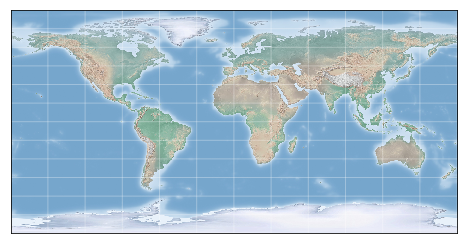

In [50]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

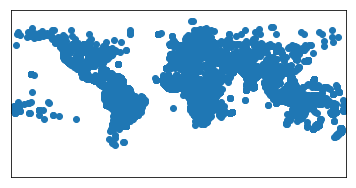

In [56]:
lat = ur_df['Latitude'].values
lon = ur_df['Longitude'].values
m.scatter(lon, lat, latlon=False)